# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Default model setup - Fishing vessels only - Same dates & ROI 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers. The comparison is done on the fishing vessel only validation set used during the training of fishing vessel VRNN model (see 'Explore Training & Validation Curves - Fishing Vessels.ipynb')

## Epoch level learning curves

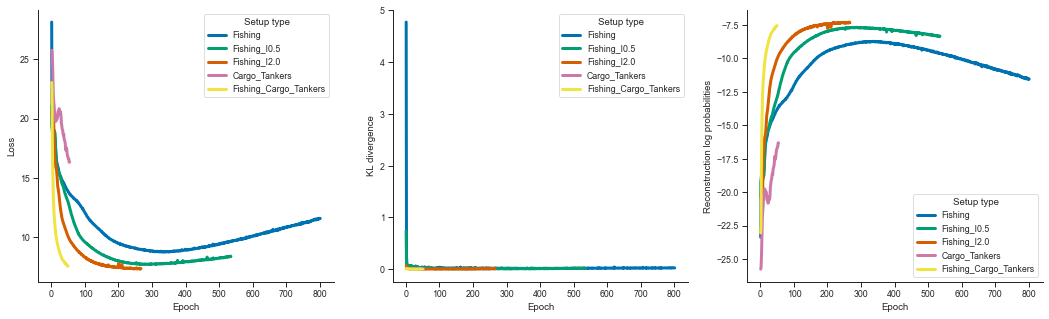

In [2]:
# Use the SummaryModels class
setup_type = "Fishing"
model_prefix = "Fishing_vessels_only_"
fishing_file = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_prefix=model_prefix)
df_fish = summary_models_fish.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type, fishing_file=fishing_file)["TrajectoryLevelData"]

setup_type = "Fishing_E300"
summary_models_fish_e300 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                         model_prefix=model_prefix, intermediate_epoch=300)
df_track_lvl_fish_e300 = summary_models_fish_e300.run_evaluation(setup_type=setup_type, 
                                                                 fishing_file=fishing_file)["TrajectoryLevelData"]

setup_type = "Fishing_I0.5"
summary_models_fish_i05 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                       model_prefix=model_prefix, inject_cargo_proportion=0.5)
df_fish_i05 = summary_models_fish_i05.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_i05 = summary_models_fish_i05.run_evaluation(setup_type=setup_type, 
                                                               fishing_file=fishing_file)["TrajectoryLevelData"]

setup_type = "Fishing_I2.0"
summary_models_fish_i20 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                       model_prefix=model_prefix, inject_cargo_proportion= 2.0)
df_fish_i20 = summary_models_fish_i20.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_i20 = summary_models_fish_i20.run_evaluation(setup_type=setup_type, 
                                                               fishing_file=fishing_file)["TrajectoryLevelData"]

setup_type = "Cargo_Tankers"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_prefix=model_prefix)
df_carg_tank = summary_models_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
                                                                 fishing_file=fishing_file)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600",
                                              model_prefix=model_prefix)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
                                                                           fishing_file=fishing_file)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df = pd.concat([df_fish, df_fish_i05, df_fish_i20, df_carg_tank, df_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue = "Setup type"
hue_order = ["Fishing", "Fishing_I0.5", "Fishing_I2.0", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order)

## Optimizer steps level learning curves

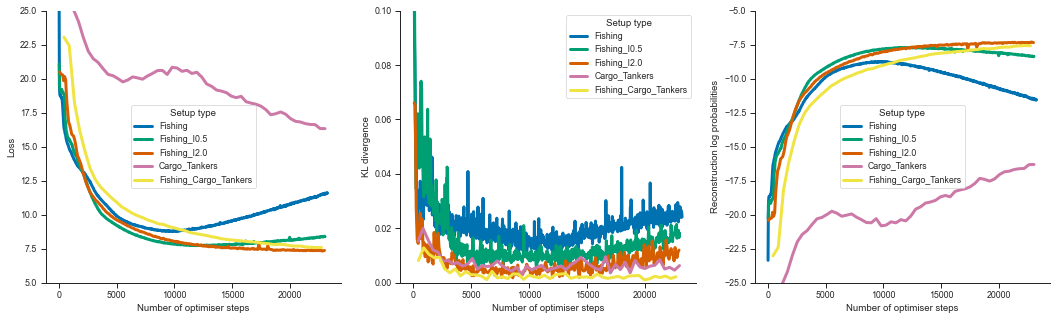

In [3]:
# Use the SummaryModels class
level = "Step"
df_fish = summary_models_fish.load_curves_df("Fishing", validation_only=True, level=level)
df_fish_i05 = summary_models_fish_i05.load_curves_df("Fishing_I0.5", validation_only=True, level=level)
df_fish_i20 = summary_models_fish_i20.load_curves_df("Fishing_I2.0", validation_only=True, level=level)
df_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers", validation_only=True, level=level)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers", validation_only=True, level=level)

# Combine the different vessel type date frames 
df = pd.concat([df_fish, df_fish_i05, df_fish_i20, df_carg_tank, df_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
x = "Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order,
                                          x=x, ylims=[(5, 25), (0, 0.1), (-25, -5)])

### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities

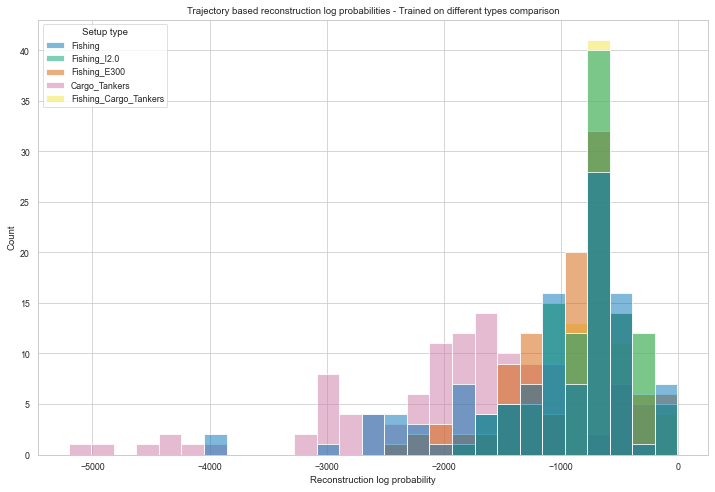

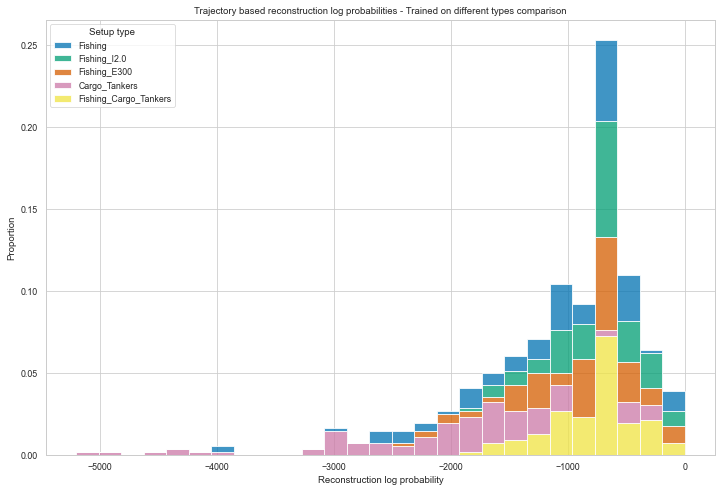

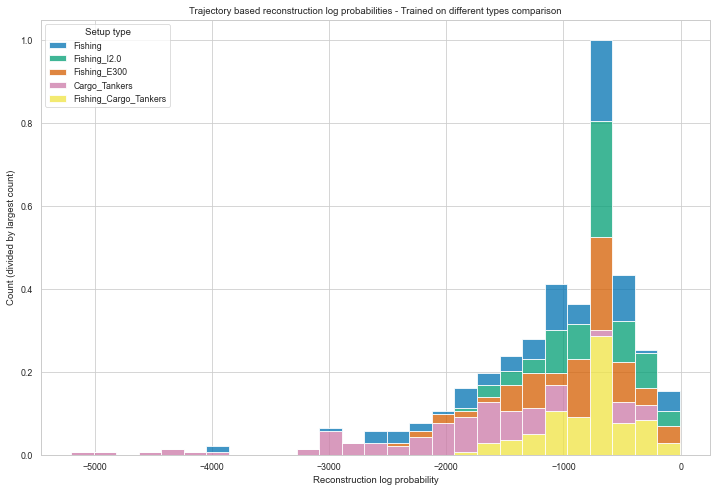

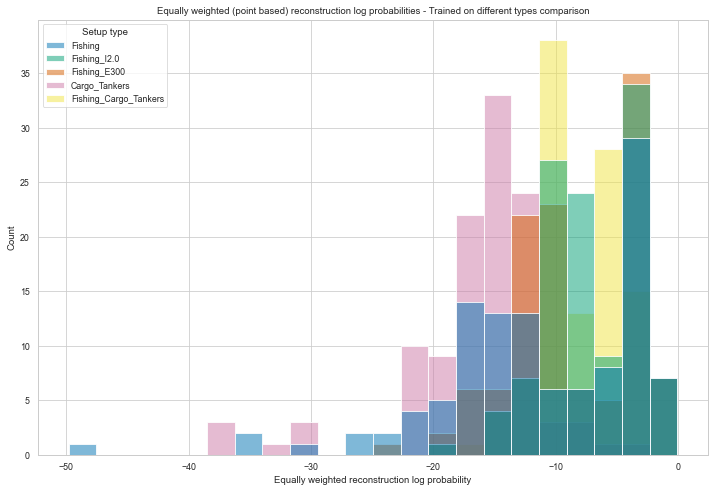

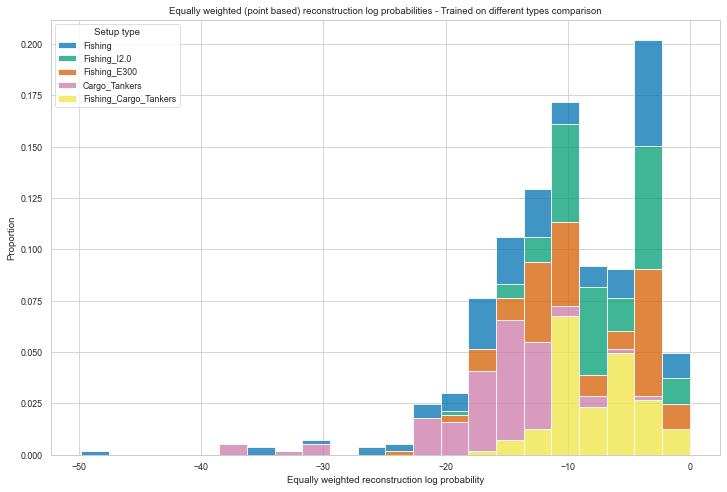

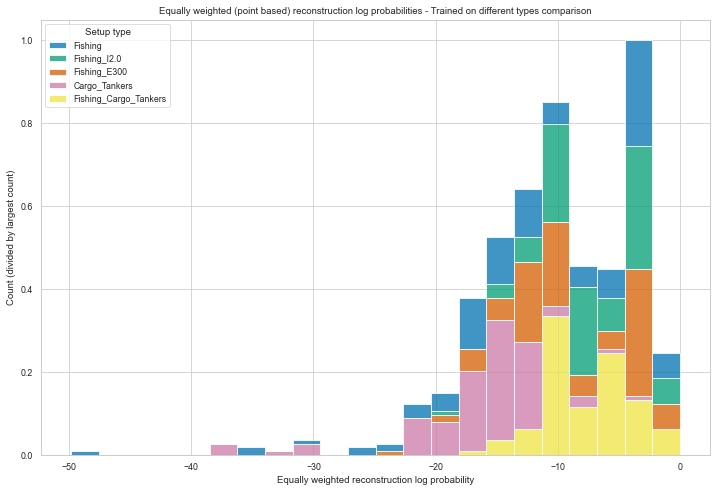

,count,mean,std,min,25%,50%,75%,max
Setup type,,,,,,,,
Cargo_Tankers,113.0,-16.313999,5.622635,-36.780064,-17.840060,-15.146963,-13.444414,-3.940981
Fishing,113.0,-11.555754,8.432999,-49.805818,-16.332072,-11.712757,-4.293273,-0.046848
Fishing_Cargo_Tankers,113.0,-7.573007,3.490780,-16.431913,-9.919405,-8.095351,-4.663620,-0.271506
Fishing_E300,113.0,-8.812691,4.923463,-23.660654,-12.069803,-9.952900,-4.282888,-0.042596
Fishing_I2.0,113.0,-7.355006,3.615522,-19.020785,-9.553082,-7.981764,-4.367350,-0.155291


In [4]:
# Combine the different vessel type date frames
df_recon = pd.concat([df_track_lvl_fish, df_track_lvl_fish_i20, df_track_lvl_fish_e300, 
                      df_track_lvl_carg_tank, df_track_lvl_fish_carg_tank])
df_recon.reset_index(drop=True, inplace=True)

# Plot trajectory based reconstruction log probabilities for fishing vessels
hue_order_tmp = hue_order
hue_order = ["Fishing", "Fishing_I2.0", "Fishing_E300", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue,
                                                hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue,
                                                hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")
hue_order = hue_order_tmp
df_recon.groupby(hue)[x].describe()

## Plot the same things as above without the overfit fishing model and cargo/tankers

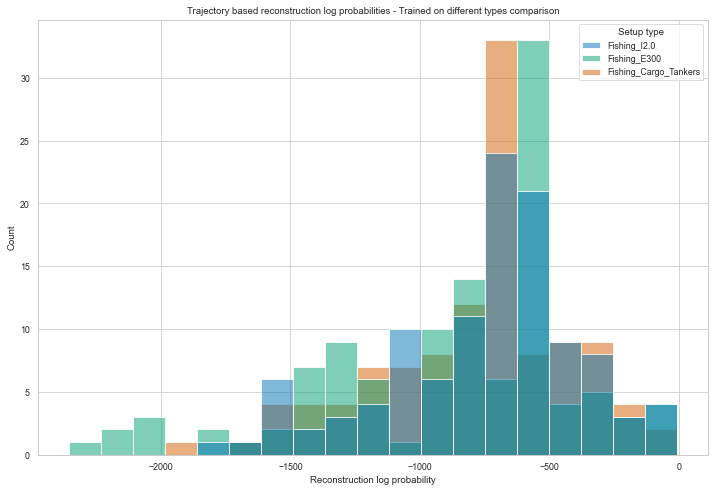

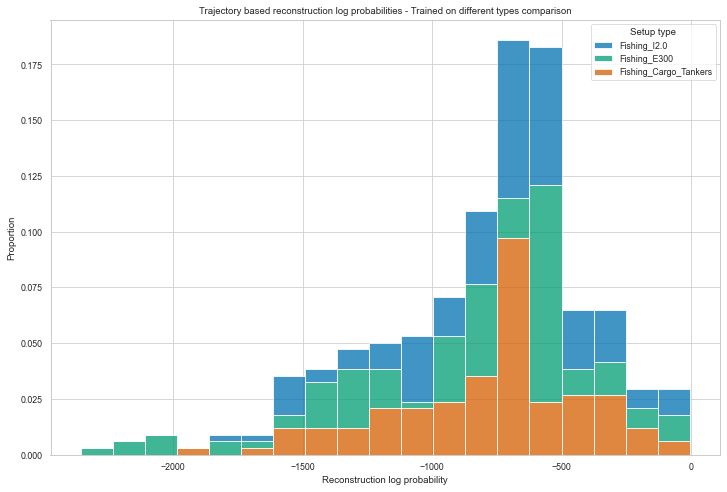

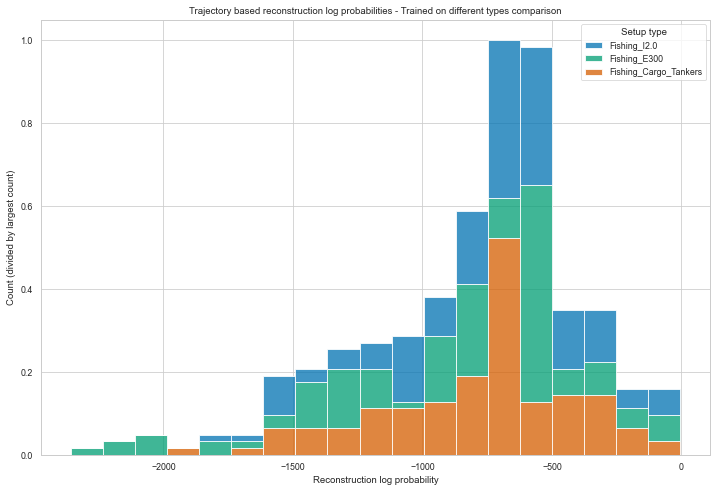

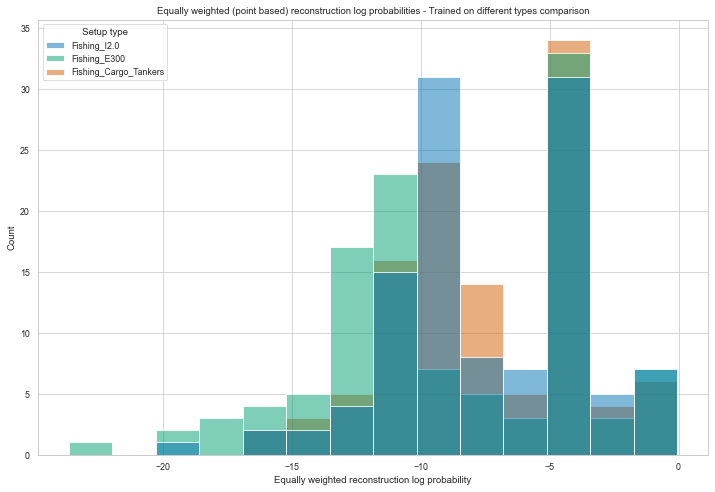

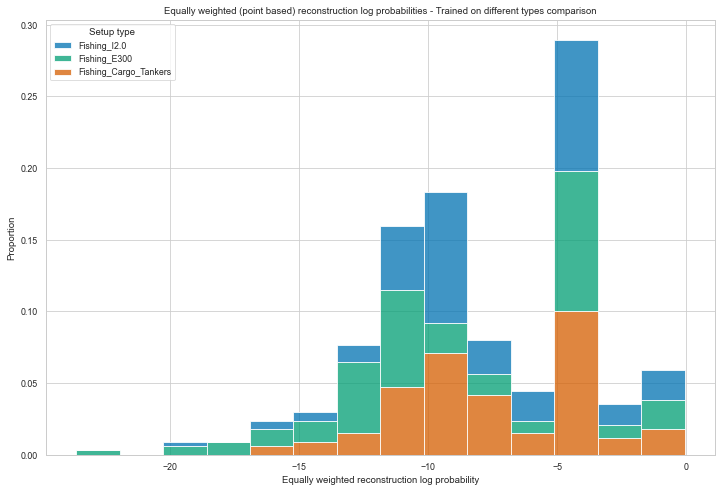

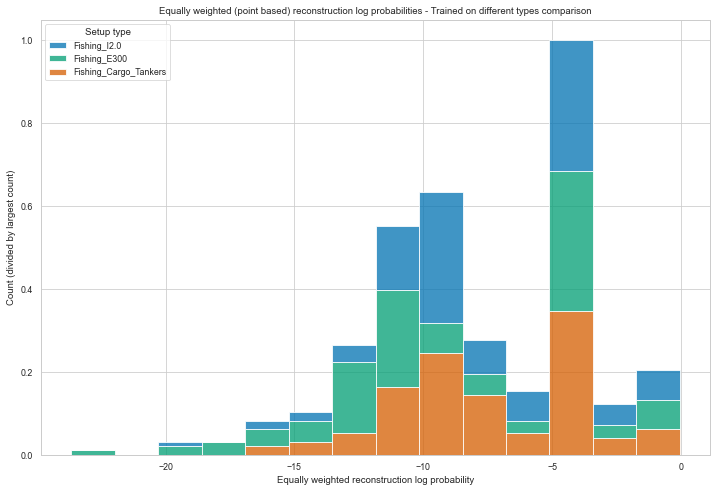

,count,mean,std,min,25%,50%,75%,max
Setup type,,,,,,,,
Fishing_Cargo_Tankers,113.0,-7.573007,3.490780,-16.431913,-9.919405,-8.095351,-4.663620,-0.271506
Fishing_E300,113.0,-8.812691,4.923463,-23.660654,-12.069803,-9.952900,-4.282888,-0.042596
Fishing_I2.0,113.0,-7.355006,3.615522,-19.020785,-9.553082,-7.981764,-4.367350,-0.155291


In [5]:
# Combine the different vessel type date frames
#df_recon = pd.concat([df_track_lvl_fish, df_track_lvl_fish_02, df_track_lvl_carg_tank, df_track_lvl_fish_carg_tank])
df_recon = pd.concat([df_track_lvl_fish_i20, df_track_lvl_fish_e300, df_track_lvl_fish_carg_tank])
df_recon.reset_index(drop=True, inplace=True)

# Plot trajectory based reconstruction log probabilities for fishing vessels
hue_order_tmp = hue_order
hue_order = ["Fishing_I2.0", "Fishing_E300", "Fishing_Cargo_Tankers"]
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue,
                                                hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for fishing vessels
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue,
                                                hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")
hue_order = hue_order_tmp
df_recon.groupby(hue)[x].describe()

# Default model setup - Fishing vessels only - Different dates 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. The comparison is now done on the new fishing vessel only validation set sampled from 01.05.2019 - 31.05.2019

## Epoch level learning curves

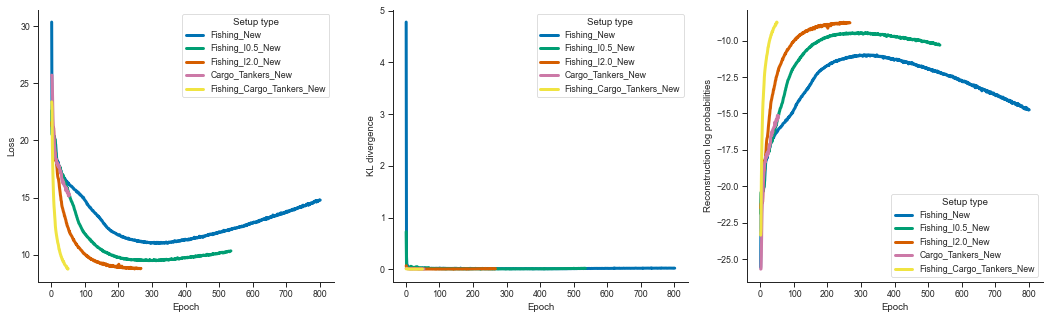

In [6]:
# Use the SummaryModels class
setup_type = "Fishing_New"
model_prefix = "New_Fishing_vessels_only_"
fishing_new_file = "RegionBornholm_01052019_31052019_Fish_14400_86400_600"
summary_models_fish = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_prefix=model_prefix)
df_fish = summary_models_fish.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish = summary_models_fish.run_evaluation(setup_type=setup_type,
                                                       fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 
setup_type = "Fishing_E300_New"
summary_models_fish_e300 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                         model_prefix=model_prefix, intermediate_epoch=300)
df_track_lvl_fish_e300 = summary_models_fish_e300.run_evaluation(setup_type=setup_type,
                                                                fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

setup_type = "Fishing_I0.5_New"
summary_models_fish_i05 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                       model_prefix=model_prefix, inject_cargo_proportion=0.5)
df_fish_i05 = summary_models_fish_i05.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_i05 = summary_models_fish_i05.run_evaluation(setup_type=setup_type, 
                                                               fishing_new_file=fishing_new_file)["TrajectoryLevelData"]

setup_type = "Fishing_I2.0_New"
summary_models_fish_i20 = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600",
                                       model_prefix=model_prefix, inject_cargo_proportion= 2.0)
df_fish_i20 = summary_models_fish_i20.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_i20 = summary_models_fish_i20.run_evaluation(setup_type=setup_type, 
                                                               fishing_new_file=fishing_new_file)["TrajectoryLevelData"]

setup_type = "Cargo_Tankers_New"
summary_models_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_prefix=model_prefix)
df_carg_tank = summary_models_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_carg_tank = summary_models_carg_tank.run_evaluation(setup_type=setup_type,
                                                                 fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

setup_type = "Fishing_Cargo_Tankers_New"
summary_models_fish_carg_tank = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", 
                                              model_prefix=model_prefix)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df(setup_type, validation_only=True)
df_track_lvl_fish_carg_tank = summary_models_fish_carg_tank.run_evaluation(setup_type=setup_type, 
                                                                           fishing_new_file=fishing_new_file)["TrajectoryLevelData"] 

# Combine the different vessel type date frames 
df_new = pd.concat([df_fish, df_fish_i05, df_fish_i20, df_carg_tank, df_fish_carg_tank])
df_new.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue_order = ["Fishing_New", "Fishing_I0.5_New", "Fishing_I2.0_New", "Cargo_Tankers_New", "Fishing_Cargo_Tankers_New"]
summary_models_fish_carg_tank.plot_curves(df_new[df_new["Data set type"] == "Validation"], hue, hue_order)

## Optimizer steps level learning curves

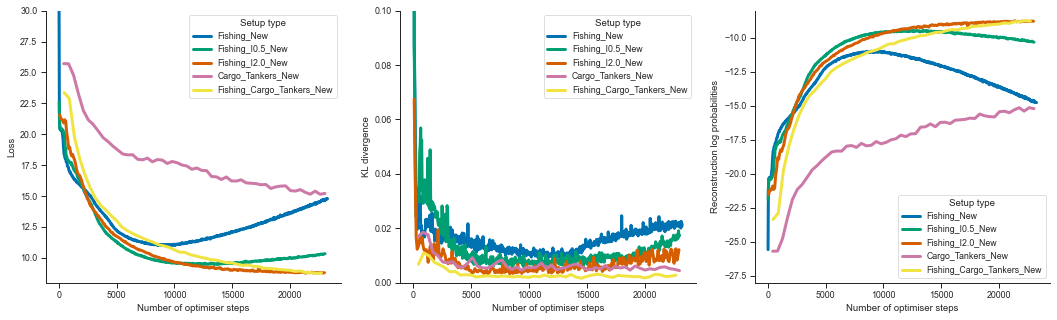

In [7]:
# Use the SummaryModels class
level = "Step"
df_fish = summary_models_fish.load_curves_df("Fishing_New", validation_only=True, level=level)
df_fish_i05 = summary_models_fish_i05.load_curves_df("Fishing_I0.5_New", validation_only=True, level=level)
df_fish_i20 = summary_models_fish_i20.load_curves_df("Fishing_I2.0_New", validation_only=True, level=level)
df_carg_tank = summary_models_carg_tank.load_curves_df("Cargo_Tankers_New", validation_only=True, level=level)
df_fish_carg_tank = summary_models_fish_carg_tank.load_curves_df("Fishing_Cargo_Tankers_New", validation_only=True, level=level)

# Combine the different vessel type date frames 
df_new = pd.concat([df_fish, df_fish_i05, df_fish_i20, df_carg_tank, df_fish_carg_tank])
df_new.reset_index(drop=True, inplace=True)

# Plot the learning curves
x = "Number of optimiser steps"
summary_models_fish_carg_tank.plot_curves(df_new[df_new["Data set type"] == "Validation"], hue, hue_order,
                                          x=x, ylims=[(8, 30), (0, 0.1), (-28, -8)])

### Tajectory (sum of points) and equally weighted point based reconstruction log probabilities

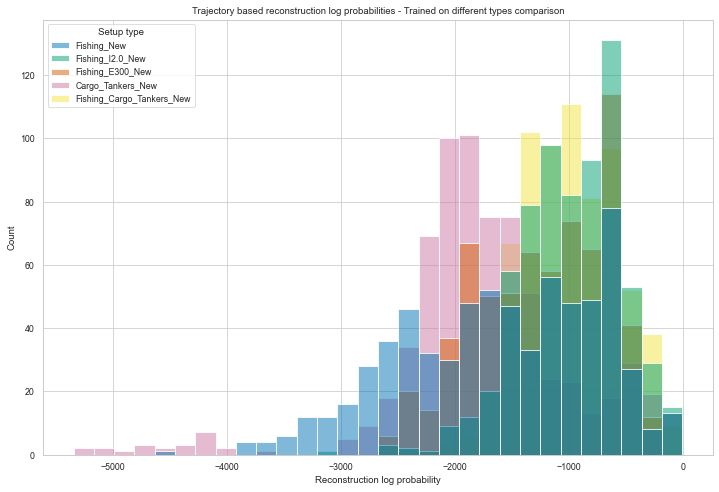

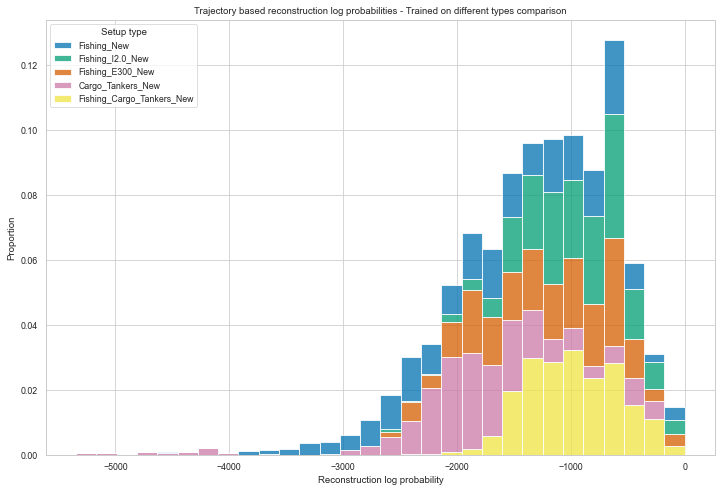

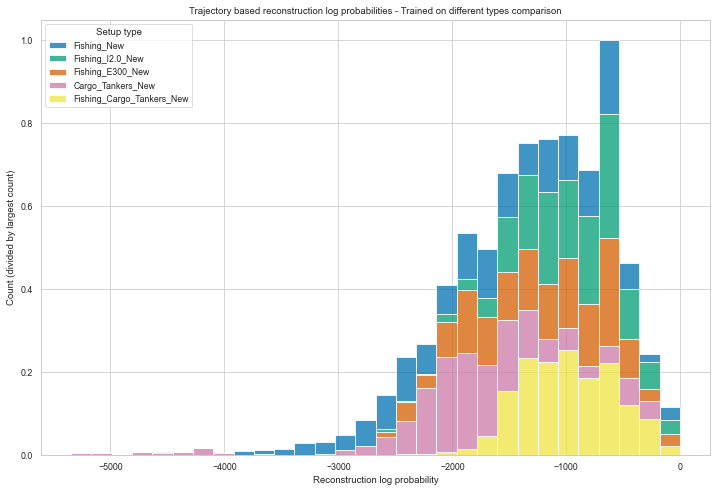

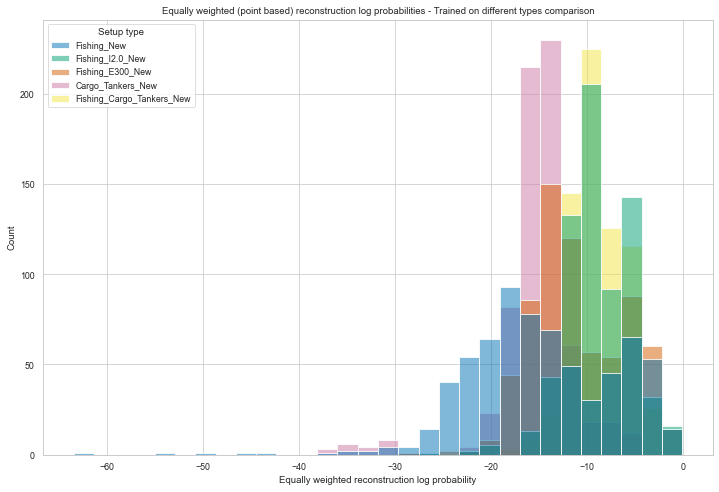

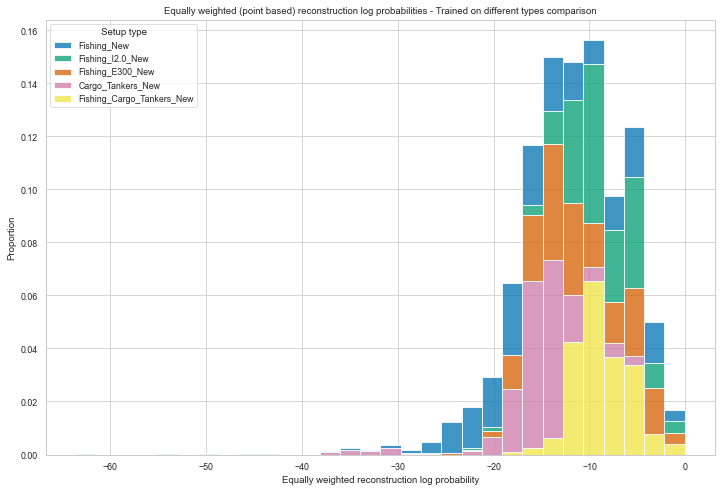

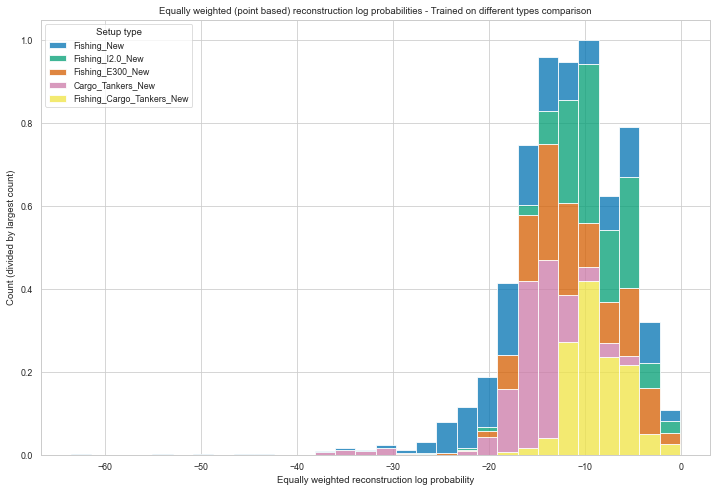

,count,mean,std,min,25%,50%,75%,max
Setup type,,,,,,,,
Cargo_Tankers_New,686.0,-15.205222,4.294122,-37.115550,-16.442475,-14.906515,-13.398413,-4.997028
Fishing_Cargo_Tankers_New,686.0,-8.771174,2.952821,-19.067558,-10.724268,-9.534444,-6.615945,-0.742353
Fishing_E300_New,686.0,-11.026793,4.802929,-28.634989,-14.457870,-11.936848,-6.693242,-0.118177
Fishing_I2.0_New,686.0,-8.780675,3.460153,-27.420250,-10.914911,-9.209463,-6.037814,-0.254142
Fishing_New,686.0,-14.761502,7.766397,-63.503169,-19.685065,-15.354497,-8.253346,-0.067833


In [8]:
# Combine the different vessel type date frames
df_recon = pd.concat([df_track_lvl_fish, df_track_lvl_fish_i20, df_track_lvl_fish_e300, 
                      df_track_lvl_carg_tank, df_track_lvl_fish_carg_tank])
df_recon.reset_index(drop=True, inplace=True)

# Plot trajectory based reconstruction log probabilities for the new fishing vessel trajectories
hue_order_tmp = hue_order
hue_order = ["Fishing_New", "Fishing_I2.0_New", "Fishing_E300_New", "Cargo_Tankers_New", "Fishing_Cargo_Tankers_New"]
bins = 30
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, bins=bins,
                                                title=title,  hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title,
                                                hue=hue, hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for the new fishing vessel trajectories
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, bins=bins,
                                                title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title,
                                                hue=hue, hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")
hue_order = hue_order_tmp
df_recon.groupby(hue)[x].describe()

## Plot the same things as above without the overfit fishing model and cargo/tankers

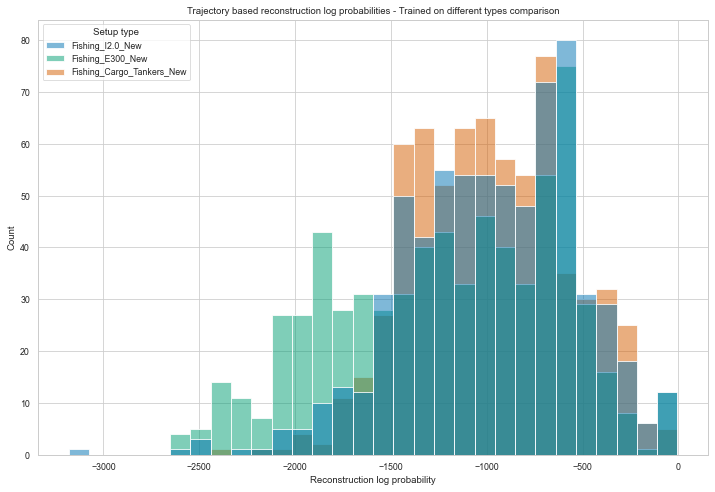

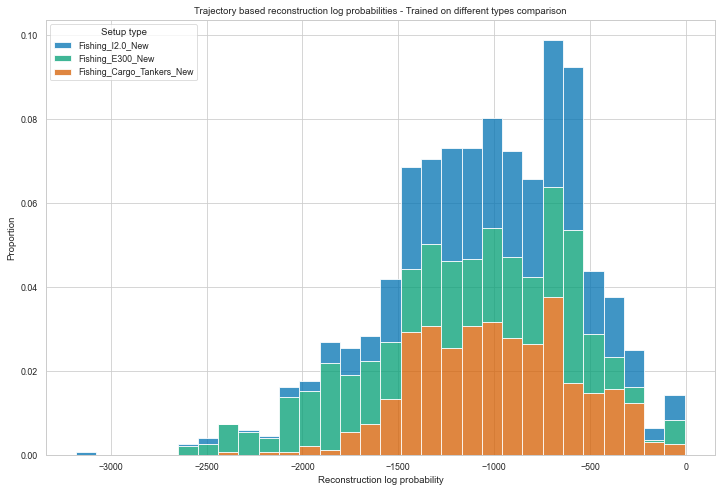

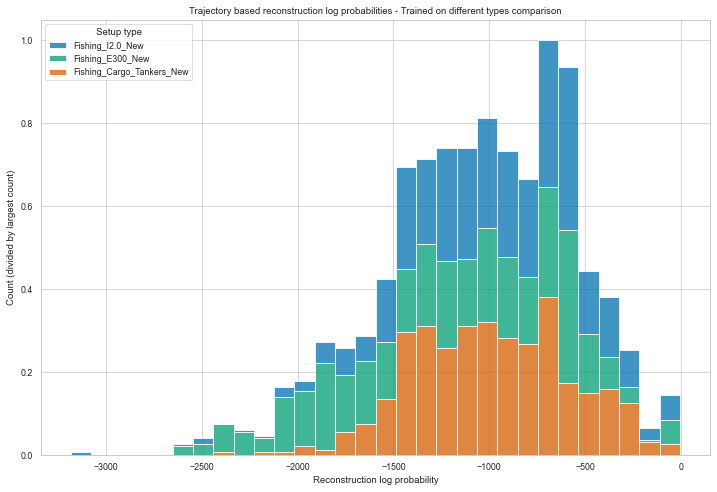

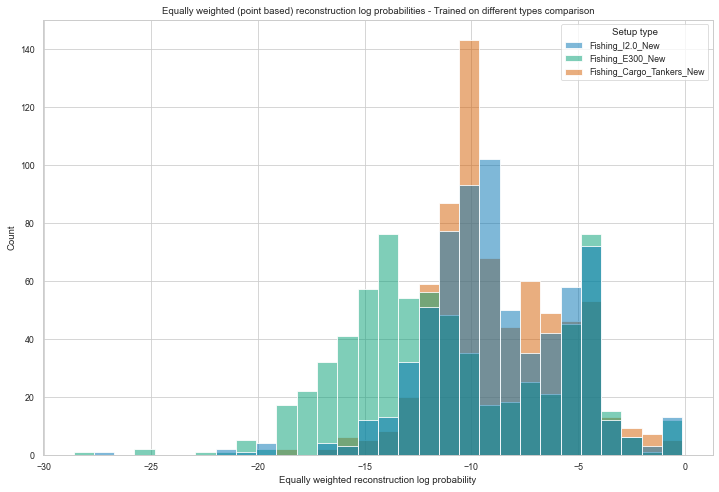

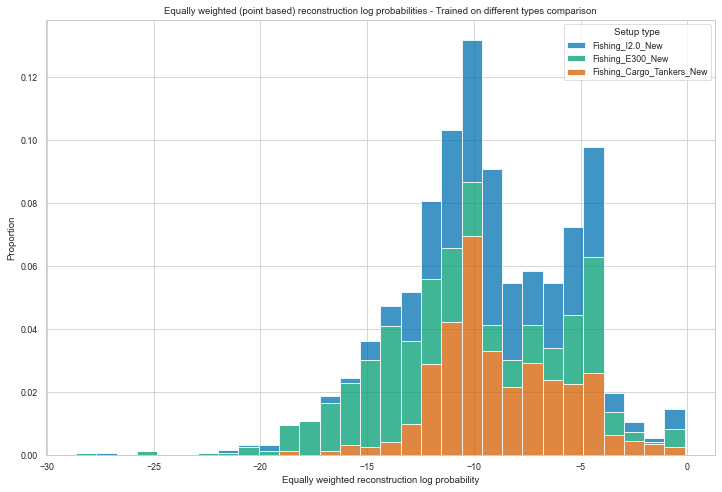

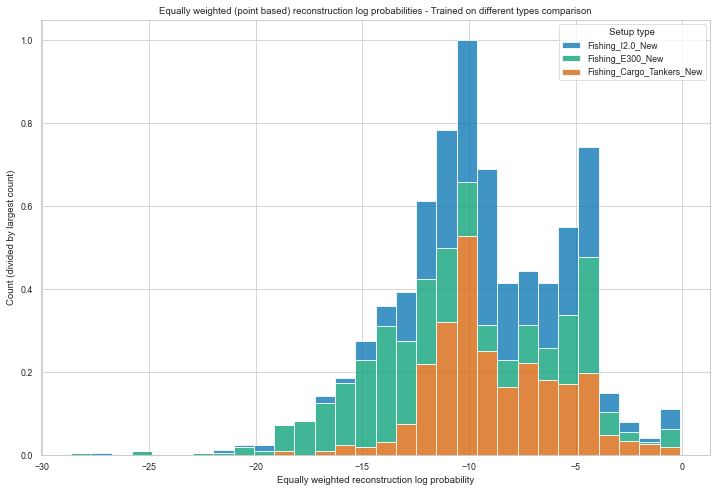

,count,mean,std,min,25%,50%,75%,max
Setup type,,,,,,,,
Fishing_Cargo_Tankers_New,686.0,-8.771174,2.952821,-19.067558,-10.724268,-9.534444,-6.615945,-0.742353
Fishing_E300_New,686.0,-11.026793,4.802929,-28.634989,-14.457870,-11.936848,-6.693242,-0.118177
Fishing_I2.0_New,686.0,-8.780675,3.460153,-27.420250,-10.914911,-9.209463,-6.037814,-0.254142


In [9]:
# Combine the different vessel type date frames
df_recon = pd.concat([ df_track_lvl_fish_i20, df_track_lvl_fish_e300, df_track_lvl_fish_carg_tank])
df_recon.reset_index(drop=True, inplace=True)

# Plot trajectory based reconstruction log probabilities for the new fishing vessel trajectories
hue_order_tmp = hue_order
hue_order = ["Fishing_I2.0_New", "Fishing_E300_New", "Fishing_Cargo_Tankers_New"]
bins = 30
title = "Trajectory based reconstruction log probabilities - Trained on different types comparison"
x = "Reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, bins=bins,
                                                title=title,  hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title,
                                                hue=hue, hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")

# Plot equally weighted (point based) reconstruction log probabilities for the new fishing vessel trajectories
title = "Equally weighted (point based) reconstruction log probabilities - Trained on different types comparison"
x = "Equally weighted reconstruction log probability"
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Histogram", x=x, bins=bins,
                                                title=title, hue=hue, hue_order=hue_order)
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title,
                                                hue=hue, hue_order=hue_order, stat="proportion")
summary_models_fish_carg_tank.hist_stacked_plot(df_recon, type="Stacked", x=x, bins=bins, title=title, hue=hue, hue_order=hue_order,
                                                stat="normalized_largest", ylabel="Count (divided by largest count)")
hue_order = hue_order_tmp
df_recon.groupby(hue)[x].describe()

# Default model setup - Fishing vessels only - Comparison
Compare the two setups shown above in one figure


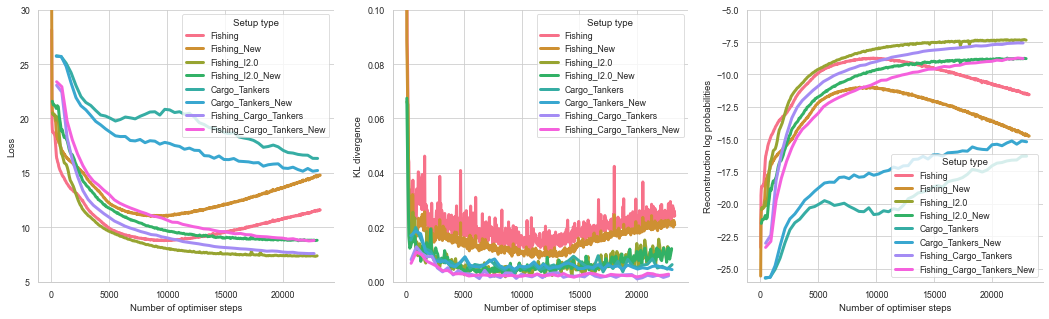

In [10]:
# Combine the different vessel type date frames 
df_compare = pd.concat([df, df_new])
df_compare.reset_index(drop=True, inplace=True)

# Plot the learning curves
x = "Number of optimiser steps"
hue = "Setup type"
hue_order = ["Fishing", "Fishing_New", "Fishing_I2.0", "Fishing_I2.0_New", "Cargo_Tankers", 
             "Cargo_Tankers_New", "Fishing_Cargo_Tankers", "Fishing_Cargo_Tankers_New"]

summary_models_fish_carg_tank.plot_curves(df_compare[df_compare["Data set type"] == "Validation"], hue, hue_order, 
                                          x=x, ylims=[(5, 30), (0, 0.1), (-26, -5)])

### Same as above, but without the cargo/tankers model

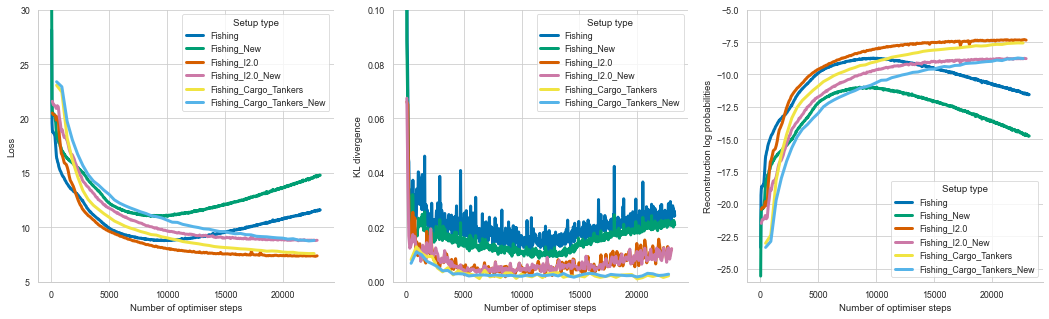

In [11]:
# Combine the different vessel type date frames 
df_compare = pd.concat([df, df_new])
df_compare.reset_index(drop=True, inplace=True)

# Plot the learning curves
x = "Number of optimiser steps"
hue = "Setup type"
hue_order = ["Fishing", "Fishing_New", "Fishing_I2.0", "Fishing_I2.0_New", "Fishing_Cargo_Tankers", "Fishing_Cargo_Tankers_New"]
summary_models_fish_carg_tank.plot_curves(df_compare[df_compare["Data set type"] == "Validation"], hue, hue_order, 
                                          x=x, ylims=[(5, 30), (0, 0.1), (-26, -5)])